# **Objective:**
To conduct **Exploratory Data Analysis (EDA)** on the Titanic dataset to uncover key insights and patterns.

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Dataset
# Load the Titanic dataset
df = pd.read_csv("/content/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Data Cleaning
# Check for Missing Values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

<ipython-input-6-b7aa87b2e88c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-b7aa87b2e88c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Remove Duplicate Entries
df.drop_duplicates(inplace=True)

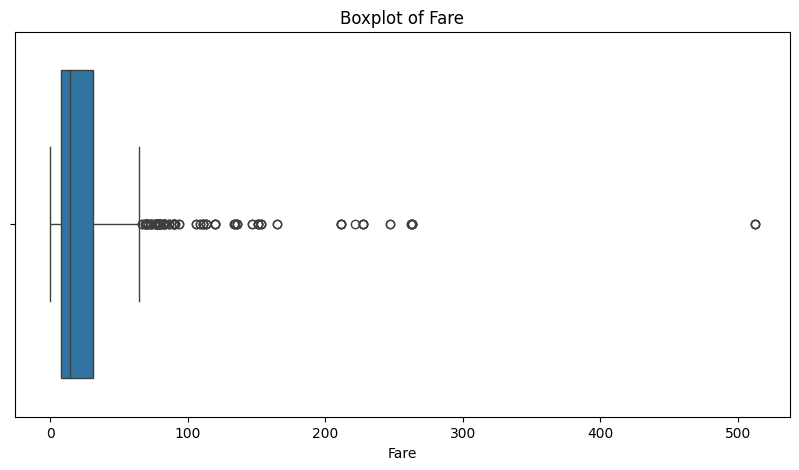

In [ ]:
# Identifying and Handling Outliers
# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

In [ ]:
# Remove Outliers in Fare (Top 1%)
df = df[df['Fare'] < df['Fare'].quantile(0.99)]

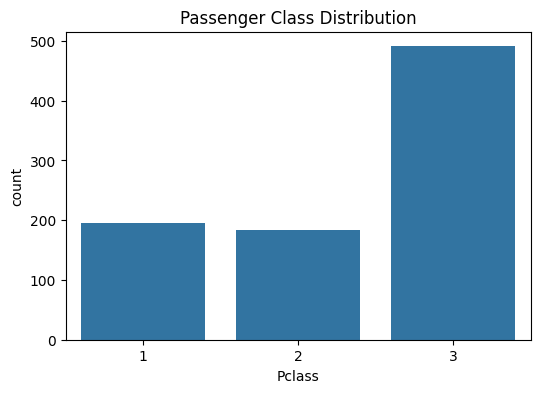

In [ ]:
# Data Visualization
# Bar Chart for Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

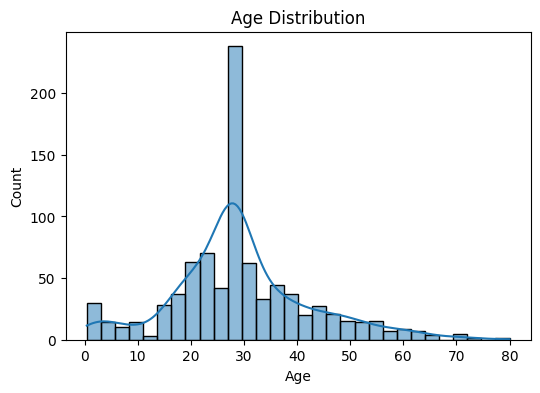

In [ ]:
# Histogram for Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

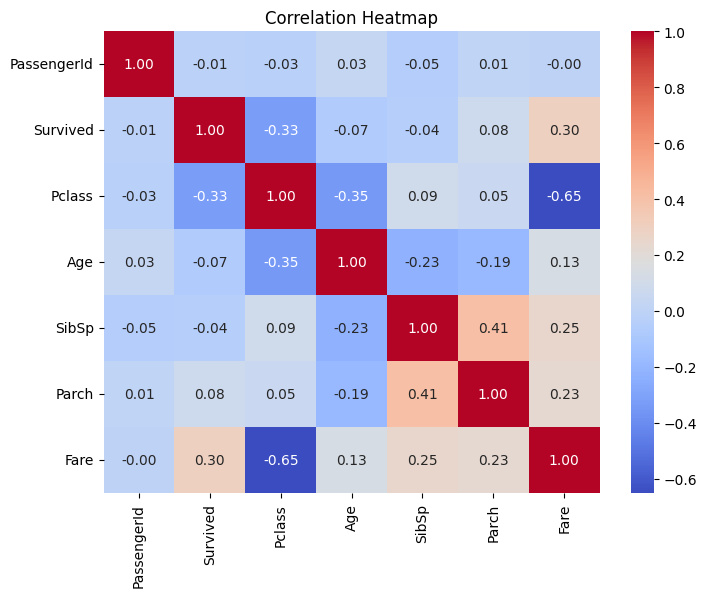

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Summary of Insights
print("Summary Insights:")
print("- Most passengers belong to 3rd class.")
print("- Age distribution is right-skewed with a peak around 20-30 years.")
print("- Fare has extreme values, handled by removing top 1% outliers.")
print("- Survived is correlated with Passenger Class and Fare.")

Summary Insights:
- Most passengers belong to 3rd class.
- Age distribution is right-skewed with a peak around 20-30 years.
- Fare has extreme values, handled by removing top 1% outliers.
- Survived is correlated with Passenger Class and Fare.
